In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix 

In [3]:
df = pd.read_csv('Volve_data.csv')

In [4]:
#look at data for each well
df.groupby('WELL_BORE_CODE').count()


,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
WELL_BORE_CODE,,,,,,,,,,,,,,,,,,,,,
NO 15/9-F-1 C,746,746,746,746,746,746,746,746,743,743,...,746,746,746,746,746,746,746,0,746,746
NO 15/9-F-11 H,1165,1165,1165,1165,1165,1165,1165,1165,1159,1159,...,1165,1159,1159,1159,1165,1165,1165,0,1165,1165
NO 15/9-F-12 H,3056,3056,3056,3056,3056,3056,3056,3056,3050,3050,...,3056,3056,3056,3056,3056,3056,3056,0,3056,3056
NO 15/9-F-14 H,3056,3056,3056,3056,3056,3056,3056,3056,3050,3050,...,3056,3056,3056,3056,3056,3056,3056,0,3056,3056
NO 15/9-F-15 D,978,978,978,978,978,978,978,978,978,978,...,978,978,978,978,978,978,978,0,978,978
NO 15/9-F-4 AH,3327,3327,3327,3327,3327,3327,3327,3175,0,0,...,0,0,0,3173,0,0,0,2990,3327,3327
NO 15/9-F-5 AH,3306,3306,3306,3306,3306,3306,3306,3173,0,0,...,160,160,151,3172,160,160,160,2716,3306,3306


In [5]:
#rename wells column
df.rename(columns = {'WELL_BORE_CODE': 'Well Number'}, inplace = True )

In [6]:
#rename wells
df['Well Number'][0: 746].replace(to_replace = 'NO 15/9-F-1 C', value = 'Well 1', inplace = True)
df['Well Number'][746: 1911].replace(to_replace = 'NO 15/9-F-11 H', value = 'Well 2', inplace = True)
df['Well Number'][1911: 4967].replace(to_replace = 'NO 15/9-F-12 H', value = 'Well 3', inplace = True)
df['Well Number'][4967: 8023].replace(to_replace = 'NO 15/9-F-14 H', value = 'Well 4', inplace = True) 
df['Well Number'][8023: 9001].replace(to_replace = 'NO 15/9-F-15 D', value = 'Well 5', inplace = True) 
df['Well Number'][9001: 12328].replace(to_replace = 'NO 15/9-F-4 AH', value = 'Well 6', inplace = True) 
df['Well Number'][12328: ].replace(to_replace = 'NO 15/9-F-5 AH',value = 'Well 7', inplace = True) 


In [7]:
#create function that splits at the commas; can be converted into float. This it to turn production data into integers 
#instead of strings
def splt_float(info):
    if info == str(info):       
        info = info.split(',')
        info = ''.join(info)
        return float(info)
    else:
        return(info)

In [8]:
#changing strings to floats 
df['BORE_OIL_VOL'] = df['BORE_OIL_VOL'].apply(lambda x: splt_float(x))
df['BORE_GAS_VOL'] = df['BORE_GAS_VOL'].apply(lambda x: splt_float(x))
df['BORE_WAT_VOL'] = df['BORE_WAT_VOL'].apply(lambda x: splt_float(x))


[Text(0,0,'BORE_OIL_VOL'),
 Text(0,0,'DP_CHOKE_SIZE'),
 Text(0,0,'BORE_GAS_VOL'),
 Text(0,0,'BORE_WAT_VOL')]

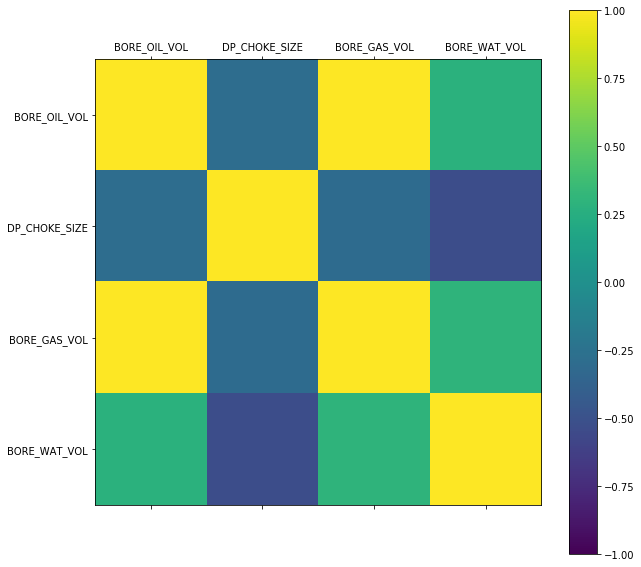

In [9]:
#correlation matrix without deleting 0 values
df_well_1 = df[df['Well Number'] == 'Well 1']
columns = ['BORE_OIL_VOL', 'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
correlations = df_well_1.loc[:, ['BORE_OIL_VOL', 'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL']].corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E03B15828>,
      dtype=object)

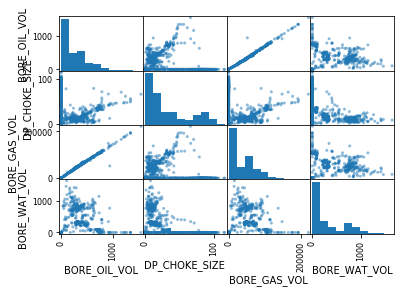

In [10]:
scatter_matrix(df_well_1.loc[:, ['BORE_OIL_VOL', 'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL']])

[Text(0,0,'BORE_OIL_VOL'),
 Text(0,0,'DP_CHOKE_SIZE'),
 Text(0,0,'BORE_GAS_VOL'),
 Text(0,0,'BORE_WAT_VOL')]

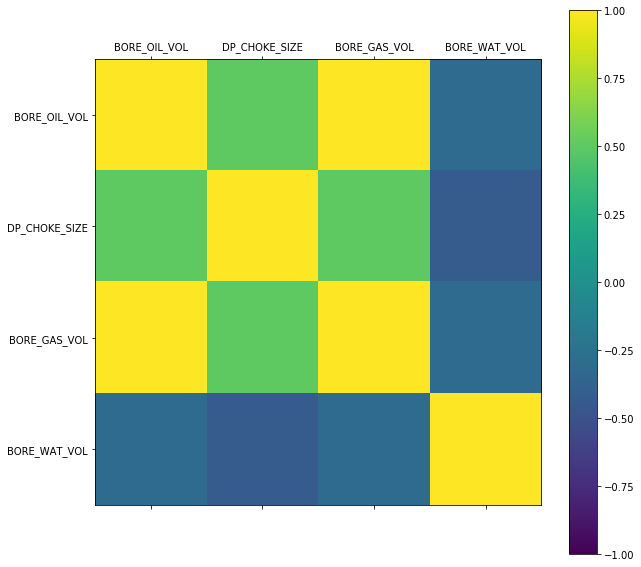

In [11]:

df_well_1 = df[(df['Well Number'] == 'Well 1') & (df['BORE_OIL_VOL'] > 0) & (df['BORE_GAS_VOL'] > 0) & (df['BORE_WAT_VOL'] > 0)]
columns = ['BORE_OIL_VOL', 'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
correlations = df_well_1.loc[:, ['BORE_OIL_VOL', 'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL']].corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)



In [12]:
df_well_1.count()

DATEPRD                     399
Well Number                 399
NPD_WELL_BORE_CODE          399
NPD_WELL_BORE_NAME          399
NPD_FIELD_CODE              399
NPD_FIELD_NAME              399
NPD_FACILITY_CODE           399
NPD_FACILITY_NAME           399
ON_STREAM_HRS               399
AVG_DOWNHOLE_PRESSURE       399
AVG_DOWNHOLE_TEMPERATURE    399
AVG_DP_TUBING               399
AVG_ANNULUS_PRESS             0
AVG_CHOKE_SIZE_P            399
AVG_CHOKE_UOM               399
AVG_WHP_P                   399
AVG_WHT_P                   399
DP_CHOKE_SIZE               399
BORE_OIL_VOL                399
BORE_GAS_VOL                399
BORE_WAT_VOL                399
BORE_WI_VOL                   0
FLOW_KIND                   399
WELL_TYPE                   399
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E046B5240>,
      dtype=object)

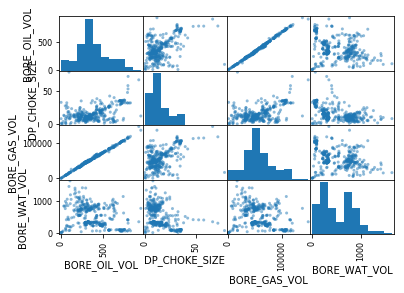

In [13]:
scatter_matrix(df_well_1.loc[:, ['BORE_OIL_VOL', 'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL']])

[Text(0,0,'BORE_OIL_VOL'),
 Text(0,0,'DP_CHOKE_SIZE'),
 Text(0,0,'BORE_GAS_VOL'),
 Text(0,0,'BORE_WAT_VOL'),
 Text(0,0,'AVG_DOWNHOLE_PRESSURE'),
 Text(0,0,'AVG_DOWNHOLE_TEMPERATURE'),
 Text(0,0,'AVG_DP_TUBING')]

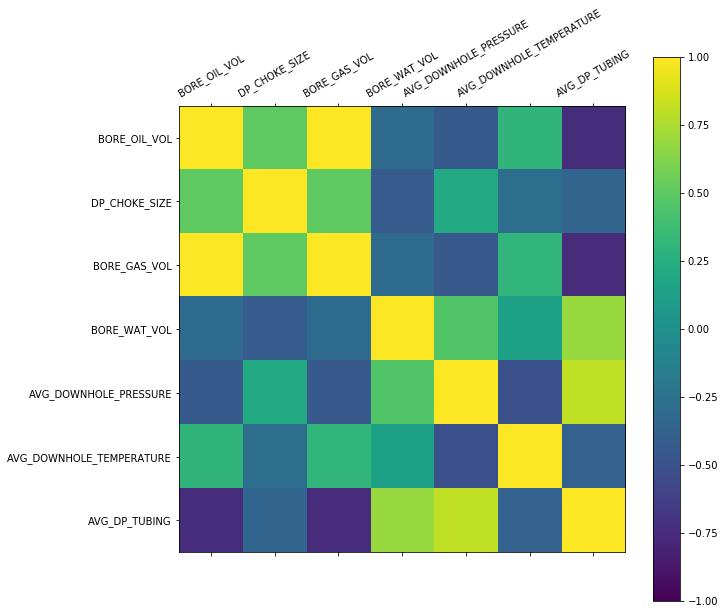

In [14]:
#correlation matrix of oil, gas, water volumes; choke size, downhole pressure, temperature, tubing
#where there are no '0' for values
columns = ['BORE_OIL_VOL', 'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING']
correlations = df_well_1[df_well_1 > 0].loc[:, ['BORE_OIL_VOL', 'DP_CHOKE_SIZE',
                                 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_DOWNHOLE_PRESSURE',  
                                 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING']].corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns, rotation = 30)
ax.set_yticklabels(columns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014E05D02748>,
      dtype=object)

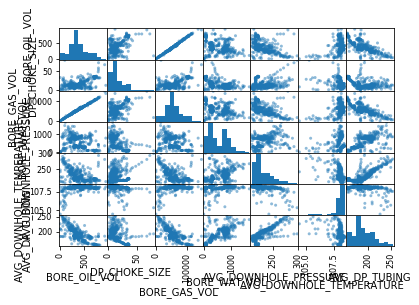

In [15]:
scatter_matrix(df_well_1[df_well_1 > 0].loc[:, ['BORE_OIL_VOL', 'DP_CHOKE_SIZE',
                                 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_DOWNHOLE_PRESSURE',  
                                 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING']])


